In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
beer_df = pd.read_csv( 'beer.csv' )

In [8]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
                                                'sodium',
                                                'alcohol',
                                                'cost']] )

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

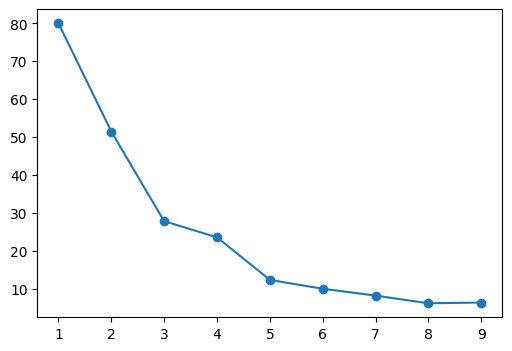

In [11]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

In [12]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [13]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
13,Becks,150,19,4.7,0.76,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [14]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
14,Kirin,149,6,5.0,0.79,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [15]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,2


In [18]:
# prompt: 3d interactive chart of cluster

import plotly.express as px

fig = px.scatter_3d(beer_df, x='calories', y='sodium', z='alcohol', color='clusterid', opacity=0.7)
fig.show()
